In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [3]:
df_water=pd.read_csv('water.csv')

In [5]:
df_water.tail()

,Unnamed: 0,location,town,mortality,hardness
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81
60,61,North,York,1378,71


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

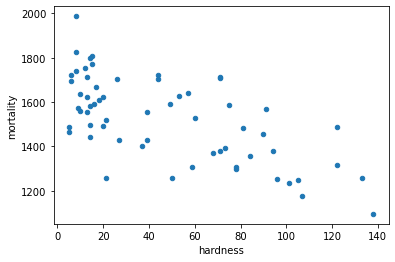

In [178]:
df_water.plot(kind='scatter', x='hardness', y='mortality')

In [179]:
# считаем коэф. корреляции Пирсона
print('считаем коэф. корреляции Пирсона')
display(df_water_South[['hardness', 'mortality']].corr())
print('********************************************************')
# считаем коэф. корреляции Спирмана
print('считаем коэф. корреляции Спирмана')
display(df_water_South[['hardness', 'mortality']].corr(method='spearman'))

считаем коэф. корреляции Пирсона


,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


********************************************************
считаем коэф. корреляции Спирмана


,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [180]:
# Регресия
X = df_water_South[['hardness']]
y = df_water_South['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print('X_train.shape')
display(X_train.shape)
print('y_train.shape')
display(y_train.shape)

model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

print('model.coef_')
display(model.coef_)
print('model.intercept_')
display(model.intercept_)

X_train.shape


(18, 1)

y_train.shape


(18,)

model.coef_


array([-3.51342921])

model.intercept_


1640.2204603423374

In [181]:
model_South.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

-2.551922301235205

это говорит о крайней неадекватности модели: простое среднее приближает лучше

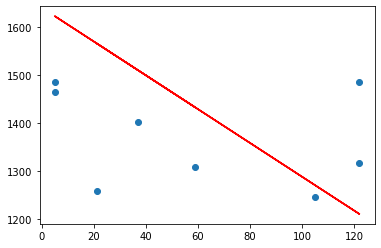

In [182]:
plt.scatter(X_test, y_test)
y_pred = model.predict(X_test)
plt.plot(X_test, y_pred, c='r')

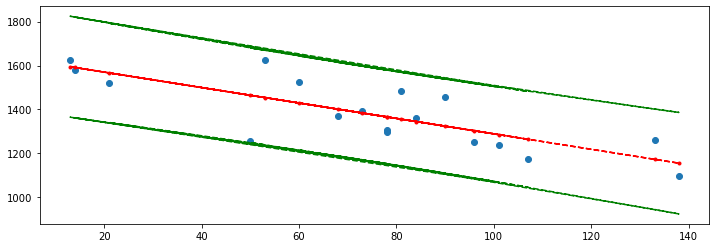

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу

model = sm.OLS(y_train, X_const)
results = model.fit()

prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')

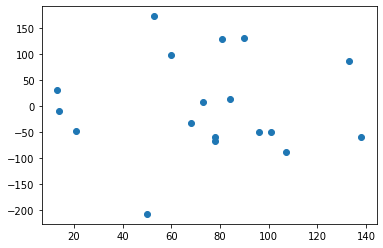

In [184]:
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 0., 0., 4., 4., 3., 1., 1., 3., 1.]),
 array([-207.54899972, -169.49497096, -131.4409422 ,  -93.38691343,
         -55.33288467,  -17.2788559 ,   20.77517286,   58.82920162,
          96.88323039,  134.93725915,  172.99128791]),
 <BarContainer object of 10 artists>)

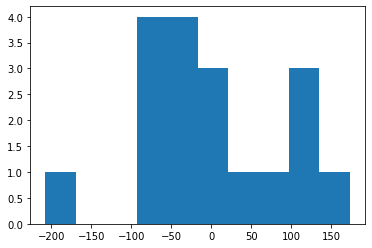

In [185]:
plt.hist(results.resid)

### Разделить данные на 2 группы - Юг

Построить точечный график - Юг


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

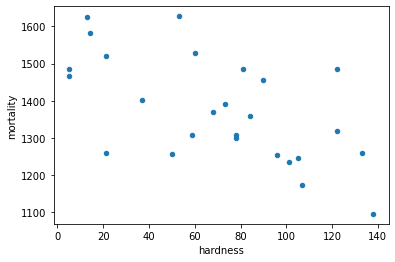

In [186]:
# Разделить данные на 2 группы - Юг
df_water_South = df_water[df_water['location'].isin(['South'])]
print('Построить точечный график - Юг')
display(df_water_South.plot(kind='scatter', x='hardness', y='mortality'))

In [187]:
# считаем коэф. корреляции Пирсона
print('считаем коэф. корреляции Пирсона - Юг')
display(df_water_South[['hardness', 'mortality']].corr())
print('********************************************************')
# считаем коэф. корреляции Спирмана
print('считаем коэф. корреляции Спирмана - Юг')
display(df_water_South[['hardness', 'mortality']].corr(method='spearman'))

считаем коэф. корреляции Пирсона - Юг


,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


********************************************************
считаем коэф. корреляции Спирмана - Юг


,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [188]:
# Регресия
X = df_water_South[['hardness']]
y = df_water_South['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print('X_train.shape')
display(X_train.shape)
print('y_train.shape')
display(y_train.shape)

model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

print('model.coef_')
display(model.coef_)
print('model.intercept_')
display(model.intercept_)

X_train.shape


(18, 1)

y_train.shape


(18,)

model.coef_


array([-3.51342921])

model.intercept_


1640.2204603423374

In [189]:
model_South.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

-2.551922301235205

это говорит о крайней неадекватности модели: простое среднее приближает лучше

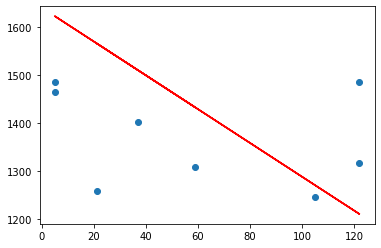

In [190]:
y_pred = model.predict(X_test_South)
plt.scatter(X_test_South, y_test_South)
plt.plot(X_test_South, y_pred, c='r')

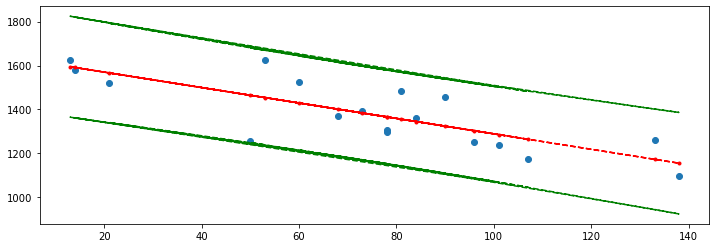

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу

model = sm.OLS(y_train, X_const)
results = model.fit()

prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')

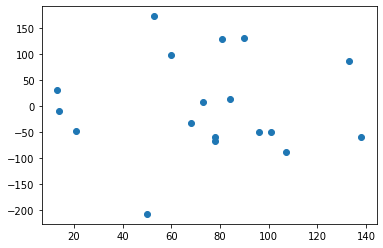

In [192]:
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 0., 0., 4., 4., 3., 1., 1., 3., 1.]),
 array([-207.54899972, -169.49497096, -131.4409422 ,  -93.38691343,
         -55.33288467,  -17.2788559 ,   20.77517286,   58.82920162,
          96.88323039,  134.93725915,  172.99128791]),
 <BarContainer object of 10 artists>)

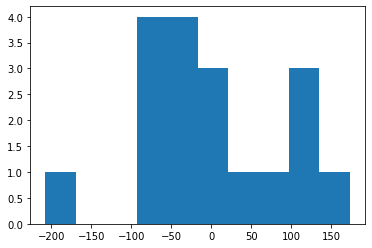

In [193]:
plt.hist(results.resid)

### Разделить данные на 2 группы - Север

Построить точечный график - Север


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

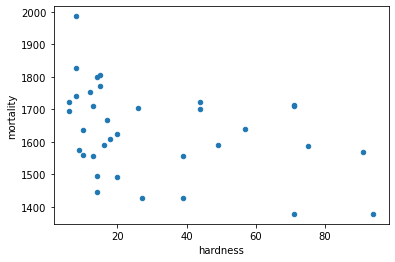

In [194]:
# Разделить данные на 2 группы - Север
df_water_North = df_water[df_water['location'].isin(['North'])]
print('Построить точечный график - Север')
df_water_North.plot(kind='scatter', x='hardness', y='mortality')

In [195]:
# считаем коэф. корреляции Пирсона
print('считаем коэф. корреляции Пирсона - Север')
display(df_water_North[['hardness', 'mortality']].corr())
print('********************************************************')
# считаем коэф. корреляции Спирмана
print('считаем коэф. корреляции Спирмана - Север')
display(df_water_North[['hardness', 'mortality']].corr(method='spearman'))

считаем коэф. корреляции Пирсона - Север


,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


********************************************************
считаем коэф. корреляции Спирмана - Север


,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [196]:
# Регресия
X = df_water_North[['hardness']]
y = df_water_North['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print('X_train.shape')
display(X_train.shape)
print('y_train.shape')
display(y_train.shape)

model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

print('model.coef_')
display(model.coef_)
print('model.intercept_')
display(model.intercept_)

X_train.shape


(24, 1)

y_train.shape


(24,)

model.coef_


array([-1.97686226])

model.intercept_


1688.150229031281

In [197]:
model_South.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

-0.4868745949757418

это говорит о крайней неадекватности модели: простое среднее приближает лучше

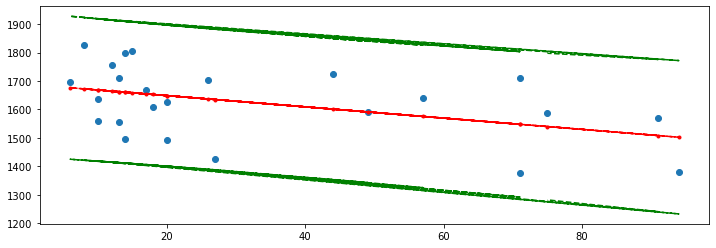

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу

model = sm.OLS(y_train, X_const)
results = model.fit()

prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')


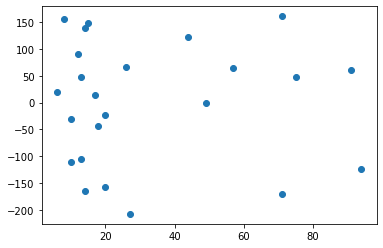

In [199]:
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 3., 3., 0., 3., 2., 3., 3., 2., 4.]),
 array([-207.77494801, -170.87675407, -133.97856012,  -97.08036618,
         -60.18217223,  -23.28397829,   13.61421566,   50.5124096 ,
          87.41060354,  124.30879749,  161.20699143]),
 <BarContainer object of 10 artists>)

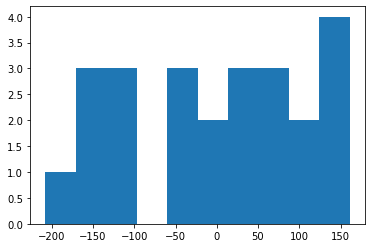

In [200]:
plt.hist(results.resid)